In [1]:
import itertools
import time
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from python.sampling_trajectory import morris_trajectory
from python.sampling_trajectory import simple_stairs
from python.sampling_trajectory import campolongo_2007
from python.sampling_trajectory import intermediate_ge_menendez_2014
from python.sampling_trajectory import final_ge_menendez_2014
from python.sampling_trajectory import distance_matrix
from python.sampling_trajectory import total_distance

In [2]:
def bar_plot(input_par_array):
    new_list = input_par_array.reshape(-1, 1).tolist()
    merged = pd.Series(itertools.chain.from_iterable(new_list))
    vc = merged.value_counts().sort_index()
    vc /= float(vc.sum())
    assert vc.sum() > 0.999
    ax = vc.plot(kind='bar')
    fig = ax.get_figure()
    fig.autofmt_xdate()

In [3]:
# Create list of n_traj_sample trajectories
n_traj_sample = 50
sample_traj_list = list()
for traj in range(0, n_traj_sample):
    seed = 123 + traj

    sample_traj_list.append(
        morris_trajectory(n_inputs=4, n_levels=5)
    )
simple_morris_sample = np.vstack(sample_traj_list)
simple_pairs_dist_matrix = distance_matrix(sample_traj_list)

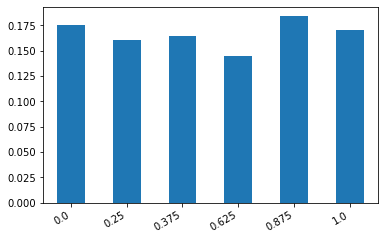

In [4]:
bar_plot(simple_morris_sample)

21.09579110145569


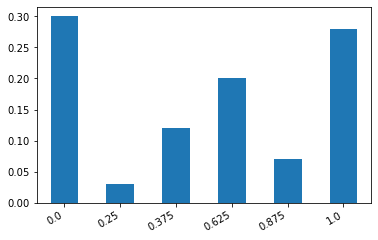

In [5]:
"""Experiment Final Ge/Menendez(2014)"""
# 30 over 15 traj combinations take too long to compute.
start = time.time()

final_ge_menendez_2014_array, _, final_gm14_pairs_dist_matrix = final_ge_menendez_2014(
    sample_traj_list, n_traj=5
)

end = time.time()
print(end - start)
bar_plot(final_ge_menendez_2014_array)

1.3983988761901855


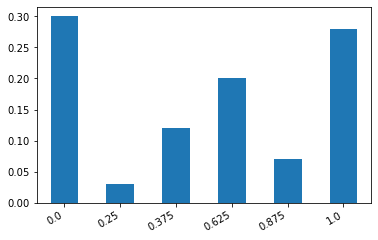

In [6]:
"""Experiment Intermediate Ge/Menendez(2014)"""
# 30 over 15 traj combinations take too long to compute.
start = time.time()

intermediate_ge_menendez_2014_array, _, intermediate_gm14_pairs_dist_matrix = intermediate_ge_menendez_2014(
    sample_traj_list, n_traj=5
)

end = time.time()
print(end - start)
bar_plot(intermediate_ge_menendez_2014_array)

37.51011633872986


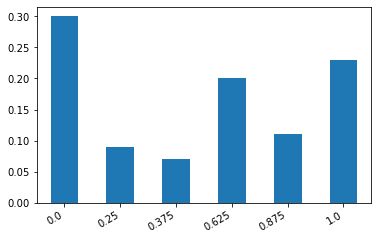

In [7]:
"""Experiment Campolongo (2007)"""
# 30 over 15 traj combinations take too long to compute.
start = time.time()

campolongo_2007_array, _, c07_pairs_dist_matrix = campolongo_2007(
    sample_traj_list, n_traj=5
)

end = time.time()
print(end - start)
bar_plot(campolongo_2007_array)

In [8]:
# compare total distances
final_gm14_total_distance = total_distance(final_gm14_pairs_dist_matrix)
intermediate_gm14_total_distance = total_distance(intermediate_gm14_pairs_dist_matrix)
c07_gm14_total_distance = total_distance(c07_pairs_dist_matrix)
simple_total_distance = total_distance(simple_pairs_dist_matrix)

print(final_gm14_total_distance)
print(intermediate_gm14_total_distance)
print(c07_gm14_total_distance)
print(simple_total_distance/10)

63.25694587590741
63.25694587590741
63.46770617465794
58.96853149697364
